# Simple Sentiment Counting With Sentiment Word Lists

The method in this notebook uses word lists for positive and negative emotion, lists called "AFINN".  There are many other word lists, if you want to do "counting" analysis.

In [6]:
%matplotlib inline
import csv
import json
import nltk
import matplotlib.pyplot as plt
import pandas as pd

import nlp_utilities as mytools


Our data files have some word lists in it already.  There are positive and negative words, and the AFINN word scores.

In [7]:
NEGWORDS = "data/sentiment_wordlists/negative-words.txt"
POSWORDS = "data/sentiment_wordlists/positive-words.txt"

def load_words(path):
    with open(path, encoding='utf-8', errors='replace') as handle:
        words = handle.readlines()
    words = [w.strip() for w in words if w[0] != ';']
    words = [word for word in words if word]  # get rid of empty string
    return words

negwords = load_words(NEGWORDS)
poswords = load_words(POSWORDS)

## Simple Counting Example

In [2]:
negwords[0:10]

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted']

In [3]:
poswords[0:10]

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation']

In [9]:
# We have some text we already tokenized.
tokens = ['i', 'hate', 'movies', 'without', 'abomination', 'but', 'i', 'love', 'this', 'movie']

In [10]:
negativity = 0
positivity = 0
for token in tokens:
    if token in negwords:
        negativity += 1
    if token in poswords:
        positivity += 1
print("neg", negativity)
print("pos", positivity)
print("net score", positivity - negativity)

neg 2
pos 1
net score -1


## An Very Efficient Way to Count List Overlap

This code is repeated in the command line file I gave you, get_sentiment_chunks.py.  

In [11]:
def get_overlap(list1, list2):
    """If you have a list of words (tokens) and you want to get the overlap with 
    a second list, like a list of sentiment polarity words.
    Returns the overlapping words and their counts as a tuple.
    """
    from collections import Counter
    list1_multiset = Counter(list1)
    list2_multiset = Counter(list2)
    overlap = list((list1_multiset & list2_multiset).elements())
    totals = []
    for word in overlap:
        totals.append((word, list1_multiset[word]))
    return totals

def get_sentiment_counts(text, filename="None", poswords=poswords, negwords=negwords):
    """This takes a text, a filename, and sentiment polarity wordlists and counts for you.
    (The filename is just for a field in the dictionary.)
    Returns a dictionary.
    """
    from collections import Counter
    count = dict()
    overlap_pos = get_overlap(text, poswords)
    overlap_neg = get_overlap(text, negwords)
    count = {
            "file": filename,
            "positive_total": int(sum(Counter(dict(overlap_pos)).values())),
            "positive_words": list(overlap_pos),
            "negative_total": int(sum(Counter(dict(overlap_neg)).values())),
            "negative_words": list(overlap_neg),
            "word_count": int(len(text)),
            "text": " ".join(text)
        }
    count['net_score'] = count['positive_total'] - count['negative_total']
    return count

In [12]:
files = mytools.get_filenames("data/movie_reviews/negative/")

In [13]:
files

['data/movie_reviews/negative/cv670_tok-9891.txt',
 'data/movie_reviews/negative/cv671_tok-2156.txt',
 'data/movie_reviews/negative/cv672_tok-20564.txt',
 'data/movie_reviews/negative/cv673_tok-20092.txt',
 'data/movie_reviews/negative/cv674_tok-16930.txt',
 'data/movie_reviews/negative/cv675_tok-10091.txt',
 'data/movie_reviews/negative/cv676_tok-0583.txt',
 'data/movie_reviews/negative/cv677_tok-11723.txt',
 'data/movie_reviews/negative/cv678_tok-18362.txt',
 'data/movie_reviews/negative/cv679_tok-8584.txt',
 'data/movie_reviews/negative/cv680_tok-12227.txt',
 'data/movie_reviews/negative/cv681_tok-11979.txt',
 'data/movie_reviews/negative/cv682_tok-16618.txt',
 'data/movie_reviews/negative/cv683_tok-11354.txt',
 'data/movie_reviews/negative/cv684_tok-10190.txt',
 'data/movie_reviews/negative/cv685_tok-15200.txt',
 'data/movie_reviews/negative/cv686_tok-19988.txt',
 'data/movie_reviews/negative/cv687_tok-25406.txt',
 'data/movie_reviews/negative/cv688_tok-29384.txt',
 'data/movie_rev

Let's check the output from one file, the first one.

In [14]:
tokens = mytools.tokenize_text(files[2])
tokens = mytools.clean_tokens(tokens)

get_sentiment_counts(tokens, files[2])  # the word lists have default values if they are in global scope, we don't need to repeat them in args.

{'file': 'data/movie_reviews/negative/cv672_tok-20564.txt',
 'negative_total': 30,
 'negative_words': [('murder', 1),
  ('plot', 1),
  ('chill', 3),
  ('bland', 1),
  ('dull', 1),
  ('crack', 1),
  ('weak', 1),
  ('disappointing', 1),
  ('broken', 1),
  ('wild', 1),
  ('wasted', 1),
  ('worst', 1),
  ('enemies', 1),
  ('forbid', 1),
  ('monotonous', 1),
  ('incessant', 1),
  ('boring', 1),
  ('villains', 1),
  ('lethal', 1),
  ('fist', 1),
  ('isolated', 1),
  ('prison', 1),
  ('tricky', 1),
  ('sadly', 1),
  ('deadly', 1),
  ('oddly', 1),
  ('nasty', 1),
  ('dying', 1)],
 'net_score': -5,
 'positive_total': 25,
 'positive_words': [('amusing', 1),
  ('important', 1),
  ('witty', 1),
  ('exciting', 2),
  ('enliven', 1),
  ('hot', 1),
  ('like', 3),
  ('supporting', 1),
  ('decent', 1),
  ('pretty', 1),
  ('good', 2),
  ('fair', 1),
  ('feisty', 1),
  ('clever', 1),
  ('better', 1),
  ('welcome', 1),
  ('proves', 1),
  ('captivating', 1),
  ('fun', 1),
  ('humor', 1),
  ('top', 1)],
 'te

## Write The Results to a File!

We will skip this in class, but it's code you can use another time if you want.

The DictWriter in CSV is a nice way to make it easier to create CSV files from Python Dictionaries.  You need to tell it which fields are your headers though.

In [14]:
myfields = ['file', 'positive_total', 'positive_words', 'negative_total', 'negative_words', 'net_score', 'word_count', 'text']

def write_sentiment_results(output_file, filenames, fields):
    """ Input args are the filename to write to, the files you are analying, and fields to write out. 
    The separator is a tab (\t).
    """
    import csv
    with open(output_file, 'w', errors='ignore') as handle:
        writer = csv.DictWriter(handle, fieldnames=fields, delimiter="\t")
        writer.writeheader()
        for input_file in filenames:
            # here we do exactly what we did above, but for all of them.
            tokens = mytools.tokenize_text(input_file)
            tokens = mytools.clean_tokens(tokens)
            dictversion = get_sentiment_counts(tokens, input_file)
            writer.writerow(dictversion)

In [15]:
negfilenames = mytools.get_filenames("data/movie_reviews/negative/")

In [16]:
write_sentiment_results("negresults.csv", negfilenames, fields=myfields)

Read in the results for a quick look... or look at the file in excel/ text editor.

In [17]:
negdf = pd.read_csv("negresults.csv", sep="\t")  # remember we used a tab separator in the output file

In [18]:
negdf.head()

,file,positive_total,positive_words,negative_total,negative_words,net_score,word_count,text
0,data/movie_reviews/negative/cv670_tok-9891.txt,23,"[('love', 2), ('cool', 1), ('enough', 1), ('go...",33,"[('dreadful', 1), ('stupidity', 2), ('stranger...",-10,314,director josiane balasko writers patrick aubre...
1,data/movie_reviews/negative/cv671_tok-2156.txt,29,"[('happy', 1), ('love', 5), ('work', 2), ('eng...",25,"[('crushing', 1), ('unnecessary', 1), ('worthl...",4,325,cast michael j fox gabrielle anwar anthony hig...
2,data/movie_reviews/negative/cv672_tok-20564.txt,25,"[('proves', 1), ('better', 1), ('clever', 1), ...",30,"[('oddly', 1), ('lethal', 1), ('wasted', 1), (...",-5,383,chill factor carbon copy speed one notable exc...
3,data/movie_reviews/negative/cv673_tok-20092.txt,15,"[('worked', 1), ('enjoy', 2), ('good', 1), ('s...",9,"[('weird', 1), ('secretive', 1), ('cliched', 1...",6,240,directed david cronenberg starring jude law je...
4,data/movie_reviews/negative/cv674_tok-16930.txt,14,"[('enjoy', 1), ('bright', 1), ('worth', 1), ('...",34,"[('crushing', 1), ('revenge', 1), ('suspect', ...",-20,391,directed bob clark cast dan monahan mark herri...


In [19]:
negdf.sort_values(by="net_score", ascending=True).head()

,file,positive_total,positive_words,negative_total,negative_words,net_score,word_count,text
23,data/movie_reviews/negative/cv693_tok-16529.txt,32,"[('cute', 1), ('neat', 1), ('cool', 1), ('smil...",55,"[('misleading', 1), ('repetitive', 1), ('stumb...",-23,649,watchers reborn film review justin felix copyr...
4,data/movie_reviews/negative/cv674_tok-16930.txt,14,"[('enjoy', 1), ('bright', 1), ('worth', 1), ('...",34,"[('crushing', 1), ('revenge', 1), ('suspect', ...",-20,391,directed bob clark cast dan monahan mark herri...
22,data/movie_reviews/negative/cv692_tok-4797.txt,26,"[('cute', 1), ('rapport', 1), ('pure', 1), ('h...",45,"[('uneven', 1), ('incoherence', 1), ('painful'...",-19,498,mr wrong directed nick castle produced marty k...
14,data/movie_reviews/negative/cv684_tok-10190.txt,22,"[('correct', 1), ('smile', 1), ('love', 1), ('...",37,"[('insult', 1), ('snobby', 1), ('ill-conceived...",-15,309,hey 've got great idea movie ok 'll get tim al...
5,data/movie_reviews/negative/cv675_tok-10091.txt,19,"[('interesting', 1), ('believable', 1), ('top'...",34,"[('subjected', 1), ('unnecessary', 1), ('fake'...",-15,455,cast alex linz olek krupa david thornton lenny...


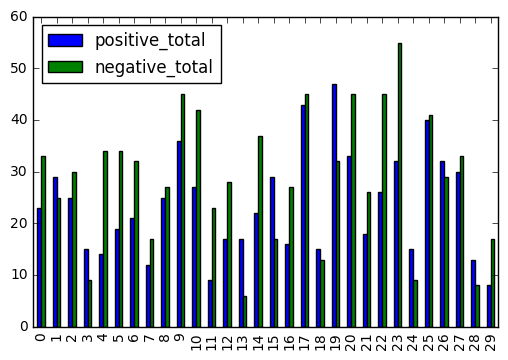

In [21]:
# this is not quite the right display for this info...
negdf[["positive_total", "negative_total"]].plot(kind="bar")

Not the right display -- let's fix it.

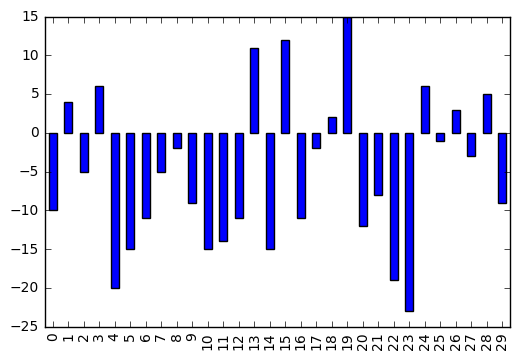

In [22]:
negdf['net_score'].plot(kind="bar")

In [23]:
# one weird outlier -- we might want to go read that one.
negfilenames[19]

'data/movie_reviews/negative/cv689_tok-12427.txt'

In [25]:
negdf.iloc[19]['text']

"united states u release date wide running length mpaa classification r profanity mature themes sexual situations theatrical aspect ratio cast jada pinkett smith tommy davidson dave chappelle paula jai parker cool j darrel heath michael ralph duane martin director daisy v mayer producers beth hubbard michael hubbard screenplay david c johnson cinematography jean lepine music michel colombier u distributor new line cinema working motion picture industry must constant source frustration front-line african american actress like jada pinkett smith despite one freshest talents available pinkett smith often relegated playing thankless supporting parts low dirty shame nutty professor problem course n't many good roles available black women take away likes waiting exhale set soul food eve 's bayou 's left chance someone 's girlfriend local whore murder victim result pinkett smith 's first opportunity atop marquee stuck stupid formulaic romantic comedy unpromising title woo actually woo latest 

Most of the bars are net negative -- which we'd expect from the negative reviews.  Let's compare to the positive reviews.

In [26]:
posfilenames = mytools.get_filenames("data/movie_reviews/positive/")

In [27]:
write_sentiment_results("posresults.csv", posfilenames, fields=myfields)

In [28]:
posdf = pd.read_csv("posresults.csv", sep="\t")

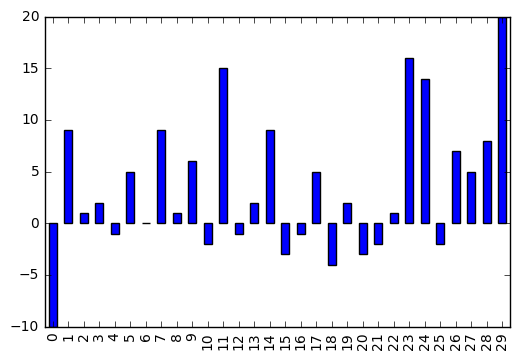

In [29]:
posdf['net_score'].plot(kind="bar")

More positive, as we'd expect!

## Using AFINN: Scored Words

In [15]:
def load_afinn(filepath):
    """ Returns a dictionary with word as key, score as value"""
    from collections import defaultdict
    scores = defaultdict(int)
    with open(filepath) as handle:
        lines = handle.readlines()
        for line in lines:
            words = line.split('\t')
            scores[words[0]] = int(words[1])
    return scores

In [16]:
afinn = load_afinn("data/sentiment_wordlists/AFINN-111.txt")

In [17]:
afinn['wavering']

-1

In [18]:
afinn['angry']

-3

In [19]:
# Using AFINN on text

score = 0

tokens = nltk.word_tokenize("This movie wasn't very good. It had shallow characters and was unbelievable.")
for token in tokens:
    print(token,afinn[token])
    try:
        score = score + afinn[token]
    except KeyError:
        continue
print("Result:", score)

This 0
movie 0
was 0
n't 0
very 0
good 3
. 0
It 0
had 0
shallow 0
characters 0
and 0
was 0
unbelievable -1
. 0
Result: 2


## Sentiment Over Time

With long works, like books, you might want to display changes in sentiment over time in the document.  We can do that by breaking up a document into "chunks" and then adding up the sentiment at each point.  Use the code I gave you in get_sentiment_chunks.py to do that.

At the command line, in the folder with this file and with a data directory, you should be able to type:

> python get_sentiment_chunks.py data/books/Austen_Pride.txt 100

In [20]:
# we can also look at it here, but it's less pretty.
df = pd.read_json("sentiment.json")

In [21]:
df.head()

,index,neg,negwords,netpos,pos,poswords,words
0,0,1,"[[prejudice, 1]]",2,3,"[[good, 1], [pride, 1], [fortune, 1]]",50
1,1,0,[],2,2,"[[well, 1], [rightful, 1]]",50
2,2,0,[],0,0,[],50
3,3,2,"[[impatiently, 1], [objection, 1]]",-1,1,"[[enough, 1]]",50
4,4,0,[],2,2,"[[fortune, 1], [delighted, 1]]",50


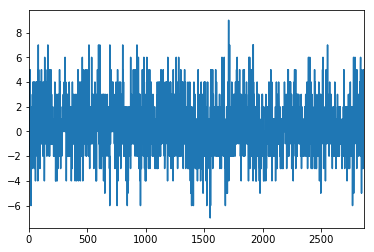

In [22]:
df['netpos'].plot()

### Adjust your window to smooth it more:

The goal is to get it to be a bit "smooth".  Change your chunk size to larger if it's not looking good. In pandas you can do smoothing, of course, using a rolling mean.

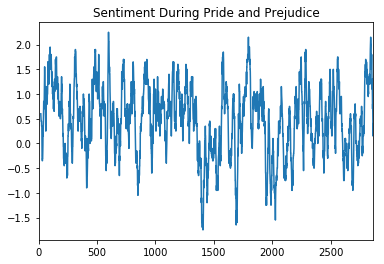

In [26]:
df['netpos'].rolling(window=20).mean().plot()
plt.title("Sentiment During Pride and Prejudice")